In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("healthy_lifestyle_city_2021.csv", quotechar='"')
print(data.head())
data.info()
data.describe()

         City  Rank Sunshine hours(City) Cost of a bottle of water(City)  \
0   Amsterdam     1                 1858                           £1.92   
1      Sydney     2                 2636                           £1.48   
2      Vienna     3                 1884                           £1.94   
3   Stockholm     4                 1821                           £1.72   
4  Copenhagen     5                 1630                           £2.19   

  Obesity levels(Country)  Life expectancy(years) (Country)  \
0                  20.40%                              81.2   
1                  29.00%                              82.1   
2                  20.10%                              81.0   
3                  20.60%                              81.8   
4                  19.70%                              79.8   

  Pollution(Index score) (City) Annual avg. hours worked  \
0                         30.93                     1434   
1                         26.86             

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
count,44.000000,44.00000,44.000000,44.000000,44.000000
mean,22.500000,78.17500,6.435000,213.977273,1443.113636
std,12.845233,5.30437,0.991202,127.190297,1388.803270
min,1.000000,56.30000,3.570000,23.000000,250.000000
25%,11.750000,75.40000,5.870000,125.250000,548.000000
50%,22.500000,80.40000,6.900000,189.500000,998.000000
75%,33.250000,81.80000,7.175000,288.250000,1674.250000
max,44.000000,83.20000,7.800000,585.000000,6417.000000


In [9]:
# Cleaning columns
# Removing currency symbol from cost columns
currency_cols = ['Cost of a bottle of water(City)', 'Cost of a monthly gym membership(City)']
for col in currency_cols:
    data[col] = data[col].replace(r'[^\d\.]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')
print(data['City'].unique())
# Clean the obesity column
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].str.replace('%', '')
data['Obesity levels(Country)'] = pd.to_numeric(data['Obesity levels(Country)'], errors='coerce')

['Amsterdam' 'Sydney' 'Vienna' 'Stockholm' 'Copenhagen' 'Helsinki'
 'Fukuoka' 'Berlin' 'Barcelona' 'Vancouver' 'Melbourne' 'Beijing'
 'Bangkok' 'Buenos Aires' 'Toronto' 'Madrid' 'Jakarta' 'Seoul' 'Frankfurt'
 'Geneva' 'Tel Aviv' 'Istanbul' 'Cairo' 'Taipei' 'Los Angeles' 'Mumbai'
 'Boston' 'Dublin' 'Tokyo' 'Chicago' 'Hong Kong' 'Shanghai' 'Brussels'
 'San Francisco' 'Paris' 'Sao Paulo' 'Zurich' 'London' 'Johannesburg'
 'Milan' 'Washington, D.C.' 'New York' 'Moscow' 'Mexico City']


In [ ]:
# Ensuring numeric columns are in numeric format
numeric_cols = [
    'Sunshine hours(City)',
    'Pollution(Index score) (City)',
    'Annual avg. hours worked'
]
for col in numeric_cols:
    data[col] = data[col].replace(r'[^\d\.]', '', regex=True) 
    data[col] = data[col].replace('', np.nan)    
    data[col] = pd.to_numeric(data[col], errors='coerce') 

In [ ]:
# Handling missing data
data.replace(['', '-', ' '], np.nan, inplace=True)
for col in data.select_dtypes(include='number').columns:
    if data[col].isna().any():
        data[col] = data[col].fillna(data[col].median())

Target Variable: Happiness Levels (categorized)

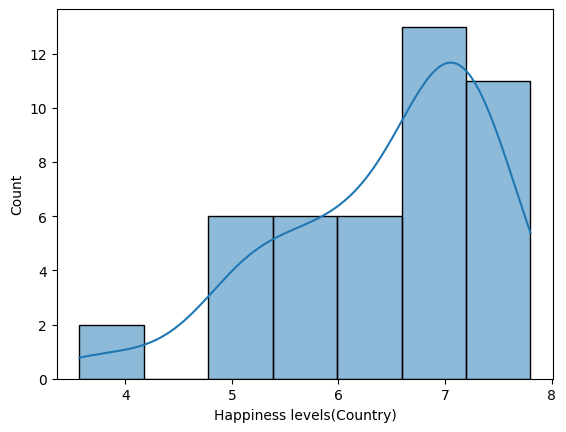

happiness_level
Low        8
Medium    12
High      24
Name: count, dtype: int64
{'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [12]:
# Categorizing happiness levels
sns.histplot(data['Happiness levels(Country)'], kde=True)
plt.show()
bins = [0, 5.5, 6.5, 10]
labels = ['Low', 'Medium', 'High']
happiness_cat = pd.Categorical(
    pd.cut(data['Happiness levels(Country)'], bins=[0, 5.5, 6.5, 10], labels=labels),
    categories=labels,
    ordered=True
)
data['happiness_level'] = happiness_cat
# encoding the levels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['happiness_level_labeled'] = le.fit_transform(data['happiness_level'])
data = data.drop(['Happiness levels(Country)'], axis=1)

print(data['happiness_level'].value_counts().sort_index())
print(dict(zip(le.classes_, le.transform(le.classes_))))

In [13]:
# Saving preprocessed data
print(data.dtypes) 
print(data.isnull().sum())
data.to_csv('cleaned_healthy_cities.csv', index=False)

City                                        object
Rank                                         int64
Sunshine hours(City)                       float64
Cost of a bottle of water(City)            float64
Obesity levels(Country)                    float64
Life expectancy(years) (Country)           float64
Pollution(Index score) (City)              float64
Annual avg. hours worked                   float64
Outdoor activities(City)                     int64
Number of take out places(City)              int64
Cost of a monthly gym membership(City)     float64
happiness_level                           category
happiness_level_labeled                      int64
dtype: object
City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hou